In [12]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [13]:
data = sp.genfromtxt("web_traffic.tsv", delimiter = "\t")

In [14]:
print data.shape
x = data[:, 0]
y = data[:, 1]
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

(743, 2)


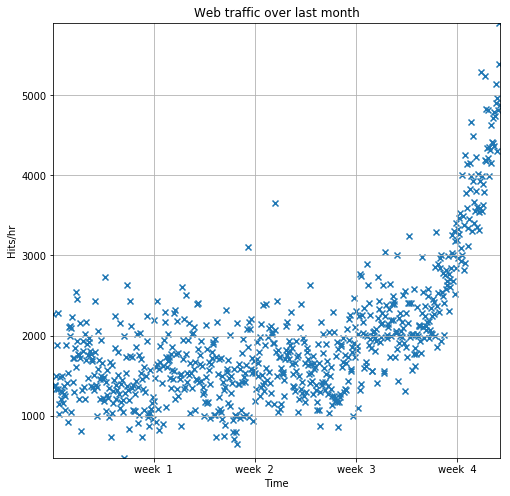

In [15]:
plt.figure(figsize=(8,8))

plt.scatter(x,y, marker = 'x')
plt.title("Web traffic over last month")
plt.xlabel("Time")
plt.ylabel("Hits/hr")
plt.xticks([w*7*24 for w in range(10)],['week % i'%w for w in range(10)])

plt.autoscale(tight = True)
plt.grid()
plt.show()

In [16]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

Model Parameters: [   2.59619213  989.02487106]
Error: 317389767.34


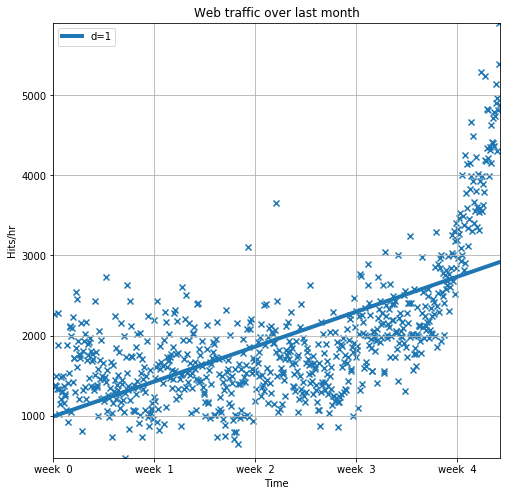

In [17]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full =True)
print ("Model Parameters: %s" % fp1)
f1 = sp.poly1d(fp1)
print ("Error: %s" % error(f1, x, y))

plt.figure(figsize=(8,8))

plt.scatter(x,y, marker = 'x')
plt.title("Web traffic over last month")
plt.xlabel("Time")
plt.ylabel("Hits/hr")
plt.xticks([w*7*24 for w in range(10)],['week % i'%w for w in range(10)])

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 4)
plt.legend(["d=%i" % f1.order], loc = "upper left")

plt.autoscale(tight = True)
plt.grid()
plt.show()

Model Parameters: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
Error: 179983507.878


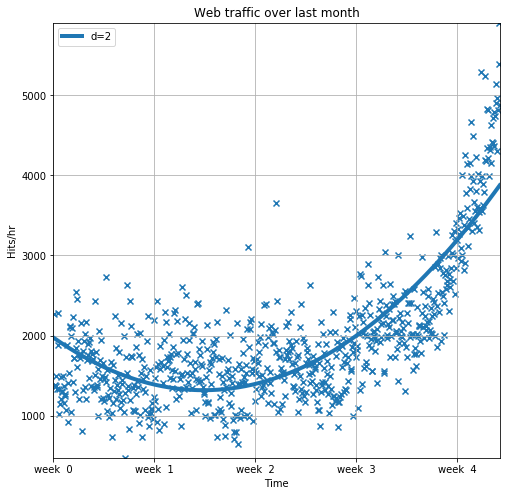

In [18]:
fp2 = sp.polyfit(x, y, 2)
print ("Model Parameters: %s" % fp2)
f2 = sp.poly1d(fp2)
print ("Error: %s" % error(f2, x, y))
plt.figure(figsize=(8,8))

plt.scatter(x,y, marker = 'x')
plt.title("Web traffic over last month")
plt.xlabel("Time")
plt.ylabel("Hits/hr")
plt.xticks([w*7*24 for w in range(10)],['week % i'%w for w in range(10)])

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f2(fx), linewidth = 4)
plt.legend(["d=%i" % f2.order], loc = "upper left")

plt.autoscale(tight = True)
plt.grid()
plt.show()

Model Parameters: [  3.04960132e-05  -2.35893797e-02   4.94226019e+00   1.33328797e+03]
Error: 139350144.032


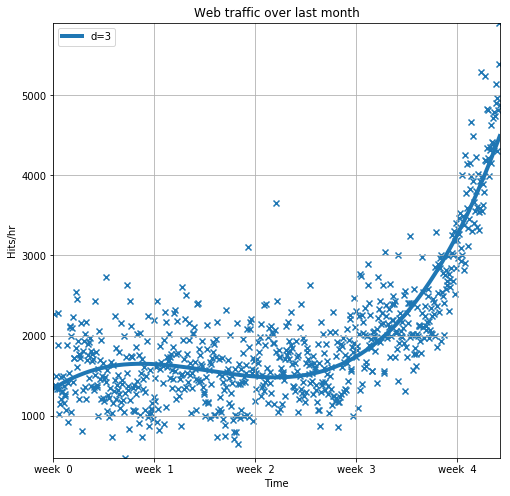

In [19]:
fp3 = sp.polyfit(x, y, 3)
print ("Model Parameters: %s" % fp3)
f3 = sp.poly1d(fp3)
print ("Error: %s" % error(f3, x, y))

plt.figure(figsize=(8,8))

plt.scatter(x,y, marker = 'x')
plt.title("Web traffic over last month")
plt.xlabel("Time")
plt.ylabel("Hits/hr")
plt.xticks([w*7*24 for w in range(10)],['week % i'%w for w in range(10)])

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f3(fx), linewidth = 4)
plt.legend(["d=%i" % f3.order], loc = "upper left")

plt.autoscale(tight = True)
plt.grid()
plt.show()

Model Parameters: [ -3.73981968e-22   1.36473756e-18  -2.14294406e-15   1.89884971e-12
  -1.04570108e-09   3.70867731e-07  -8.45604588e-05   1.19167041e-02
  -9.41618606e-01   3.33703840e+01   1.26421204e+03]
Error: 121942326.364


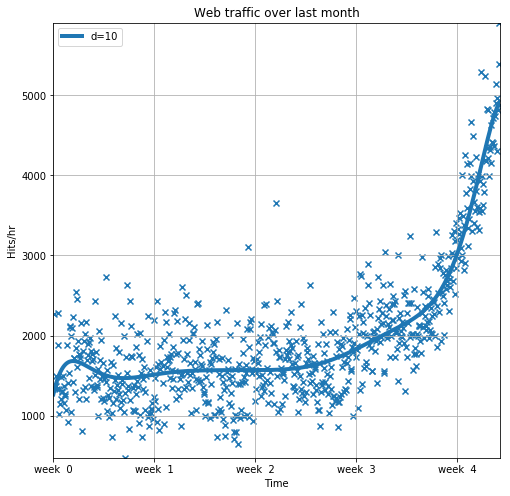

In [20]:
fp10 = sp.polyfit(x, y, 10)
print ("Model Parameters: %s" % fp10)
f10 = sp.poly1d(fp10)
print ("Error: %s" % error(f10, x, y))

plt.figure(figsize=(8,8))

plt.scatter(x,y, marker = 'x')
plt.title("Web traffic over last month")
plt.xlabel("Time")
plt.ylabel("Hits/hr")
plt.xticks([w*7*24 for w in range(10)],['week % i'%w for w in range(10)])

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f10(fx), linewidth = 4)
plt.legend(["d=%i" % f10.order], loc = "upper left")

plt.autoscale(tight = True)
plt.grid()
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


Error: 109452409.434


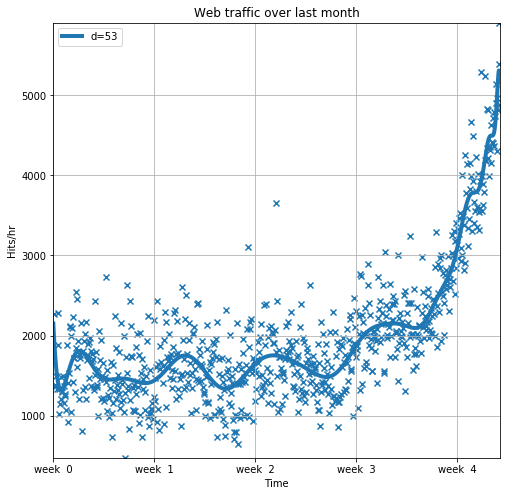

In [21]:
fp100 = sp.polyfit(x, y, 100)
# print ("Model Parameters: %s" % fp100)
f100 = sp.poly1d(fp100)
print ("Error: %s" % error(f100, x, y))

plt.figure(figsize=(8,8))

plt.scatter(x,y, marker = 'x')
plt.title("Web traffic over last month")
plt.xlabel("Time")
plt.ylabel("Hits/hr")
plt.xticks([w*7*24 for w in range(10)],['week % i'%w for w in range(10)])

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f100(fx), linewidth = 4)
plt.legend(["d=%i" % f100.order], loc = "upper left")

plt.autoscale(tight = True)
plt.grid()
plt.show()

Error inflection = 132950348.197616


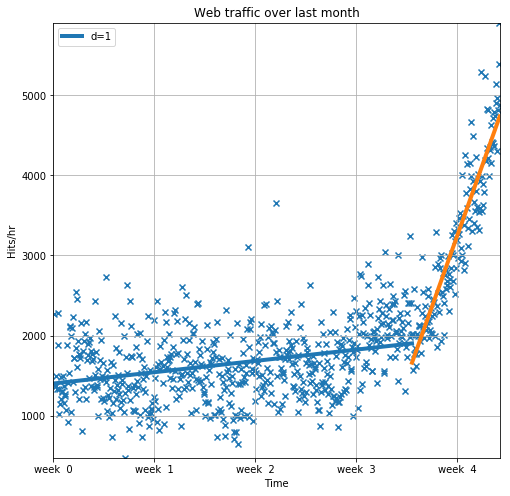

In [22]:
inflection = int(3.5*7*24)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print ("Error inflection = %f" % (fa_error+ fb_error))

plt.figure(figsize=(8,8))

plt.scatter(x,y, marker = 'x')
plt.title("Web traffic over last month")
plt.xlabel("Time")
plt.ylabel("Hits/hr")
plt.xticks([w*7*24 for w in range(10)],['week % i'%w for w in range(10)])

fx = sp.linspace(0, x[inflection], 1000)
plt.plot(fx, fa(fx), linewidth = 4)
plt.legend(["d=%i" % f1.order], loc = "upper left")

fx = sp.linspace(x[inflection], x[-1], 1000)
plt.plot(fx, fb(fx), linewidth = 4)
plt.legend(["d=%i" % f1.order], loc = "upper left")

plt.autoscale(tight = True)
plt.grid()
plt.show()
